<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/DL_Projects_Codes/Breast_Cancer_Classification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Classification using Neural Network**

#**Dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

#**Data Collection**

In [3]:
from sklearn.datasets import load_breast_cancer

# check
breast_cancer = load_breast_cancer()

print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

**Numpy arrays to Dataframe**

In [4]:
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [5]:
# check
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Appending Target column**

In [6]:
breast_cancer_df['target'] = breast_cancer.target

# check
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#**Pre processing & Visualization**

In [7]:
# pre processing

# check shape
breast_cancer_df.shape

(569, 31)

In [8]:
# check information
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# sum of null
breast_cancer_df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


* seems no null values

In [10]:
# check Imbalanced State

breast_cancer_df['target'].value_counts()

,count
target,
1,357
0,212


* seems in balanced state

**Basic Statistics**

In [11]:
# basic stats

for col in breast_cancer_df.columns:
    print(breast_cancer_df[col].describe())
    print()
    print('-----------------------------------------------------')

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

-----------------------------------------------------
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: mean texture, dtype: float64

-----------------------------------------------------
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: mean perimeter, dtype: float64

-----------------------------------------------------
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: mean area, dtype: float64

------------------------------------------------

* seems, a lot of columns contains more mean then median
* That will show right skewness in distribution, let's check

**Visualization**

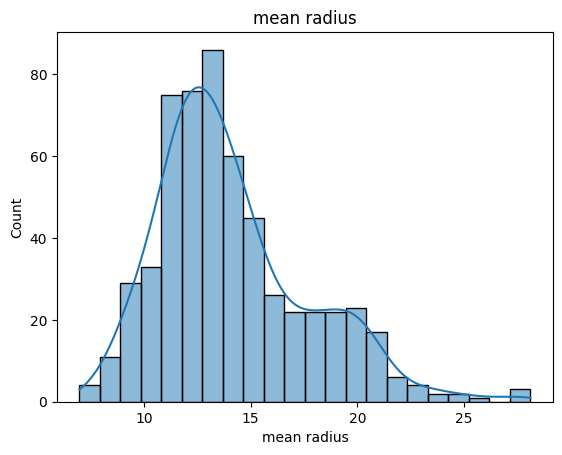


-------------------------------------------------------------------


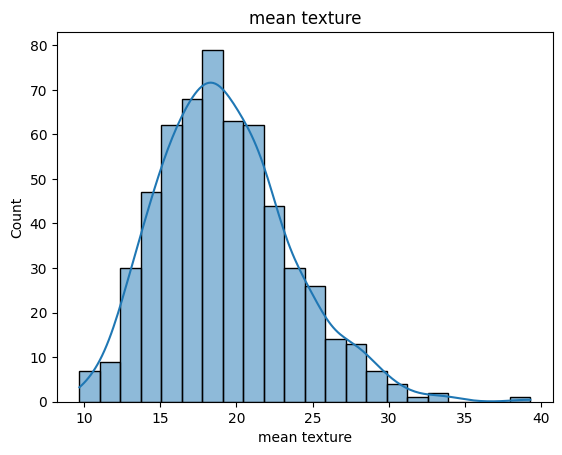


-------------------------------------------------------------------


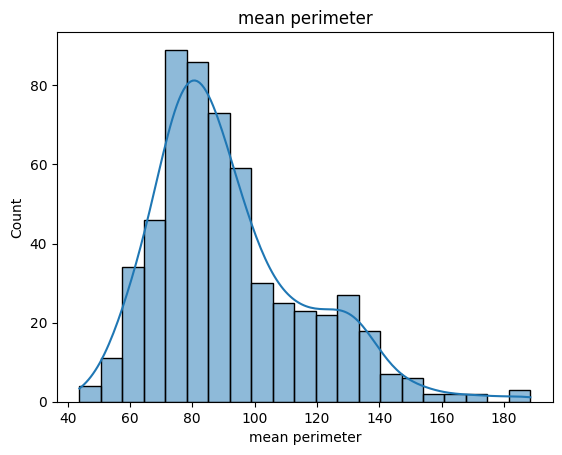


-------------------------------------------------------------------


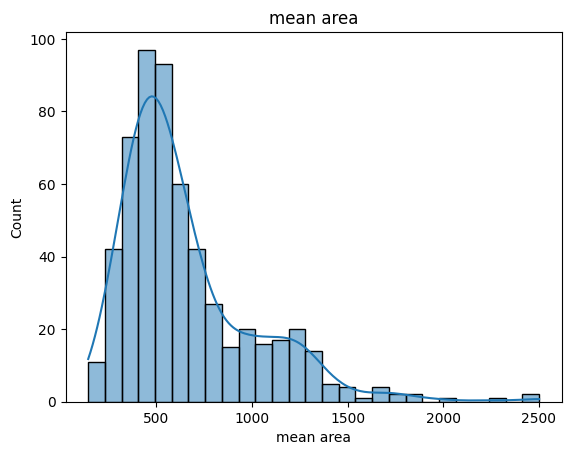


-------------------------------------------------------------------


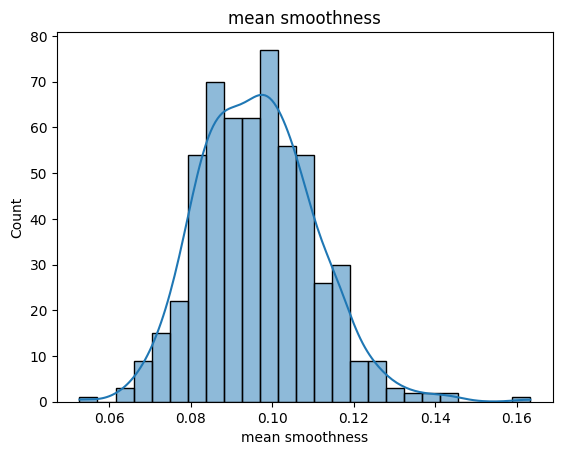


-------------------------------------------------------------------


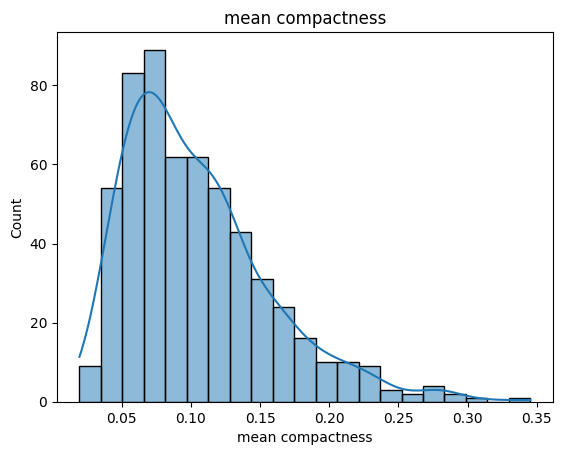


-------------------------------------------------------------------


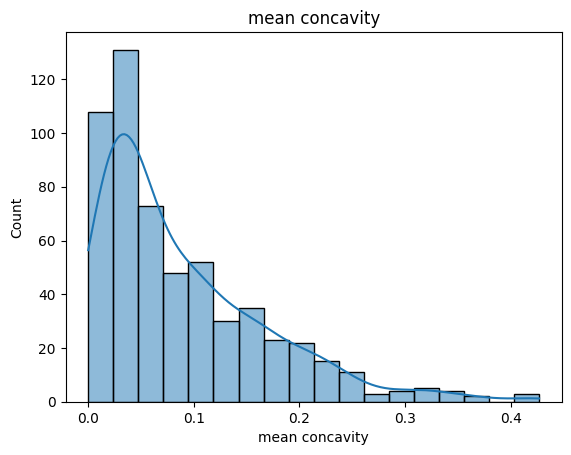


-------------------------------------------------------------------


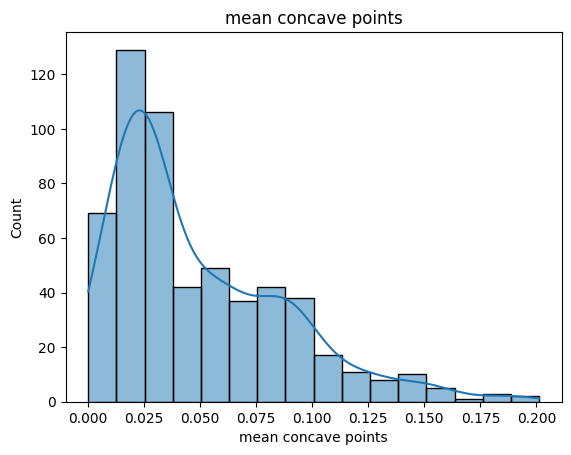


-------------------------------------------------------------------


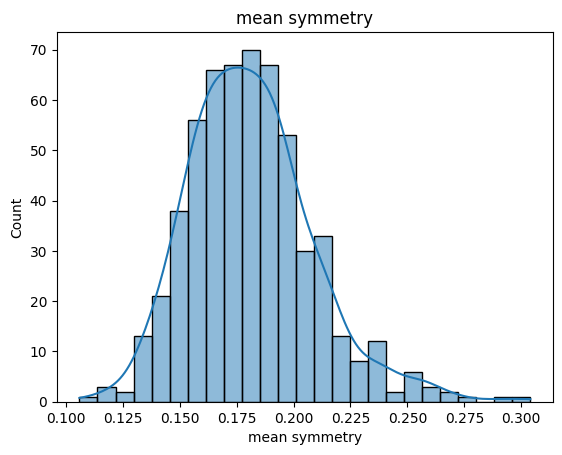


-------------------------------------------------------------------


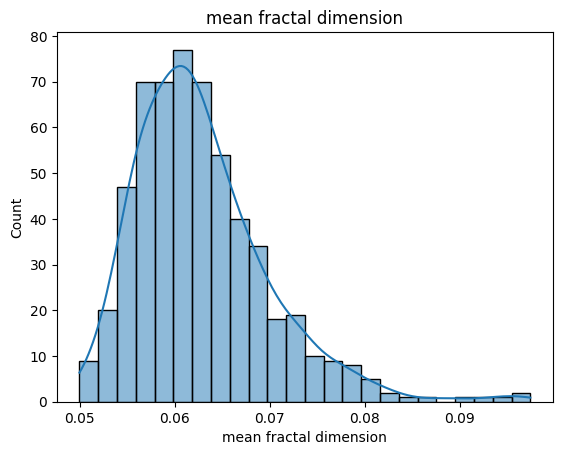


-------------------------------------------------------------------


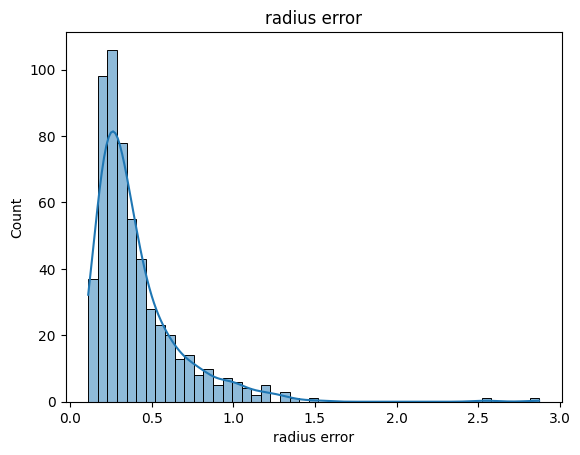


-------------------------------------------------------------------


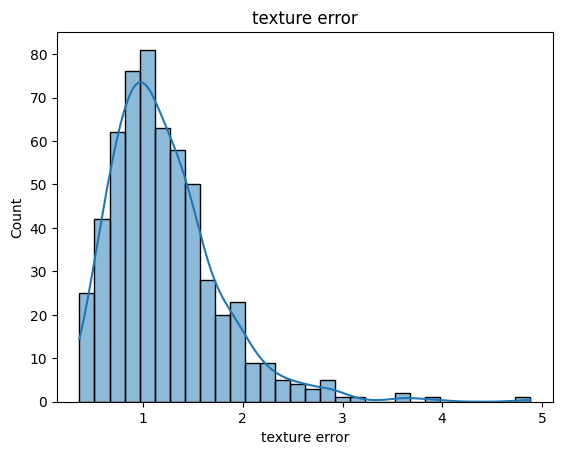


-------------------------------------------------------------------


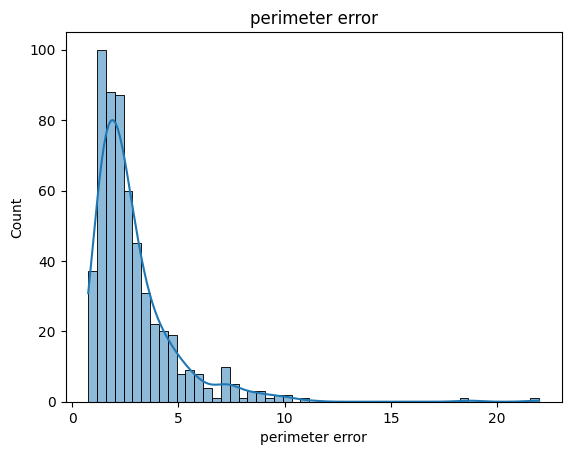


-------------------------------------------------------------------


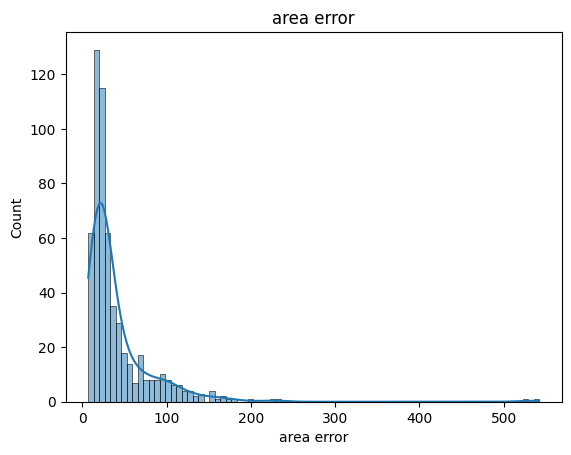


-------------------------------------------------------------------


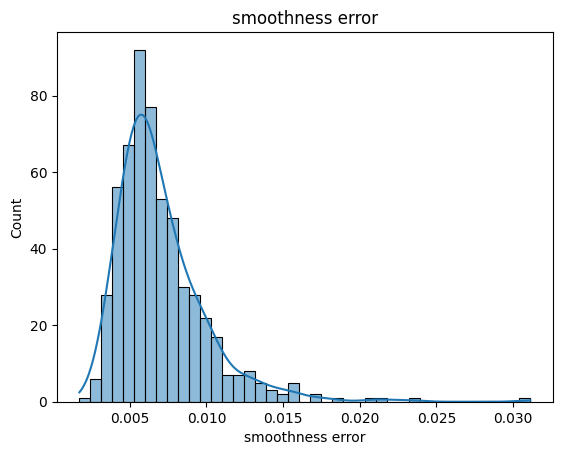


-------------------------------------------------------------------


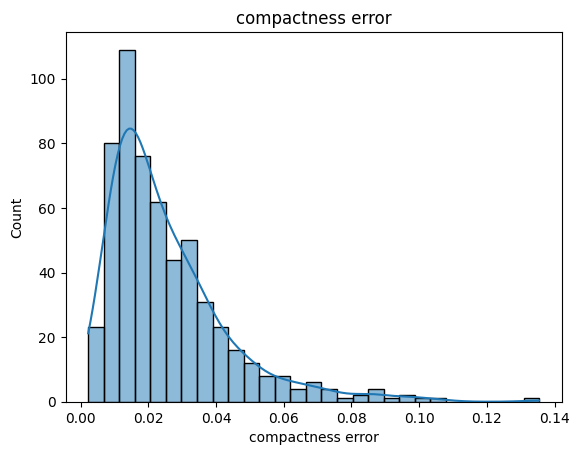


-------------------------------------------------------------------


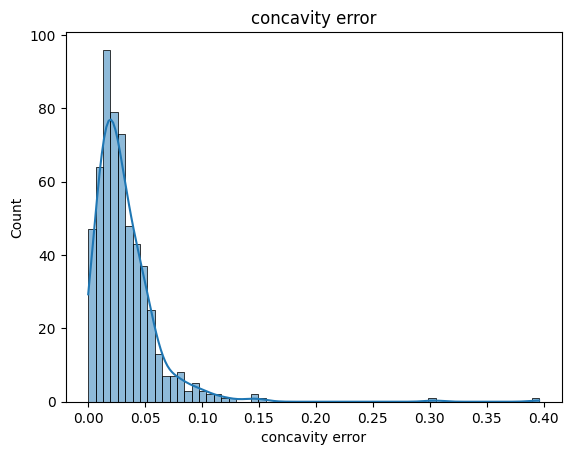


-------------------------------------------------------------------


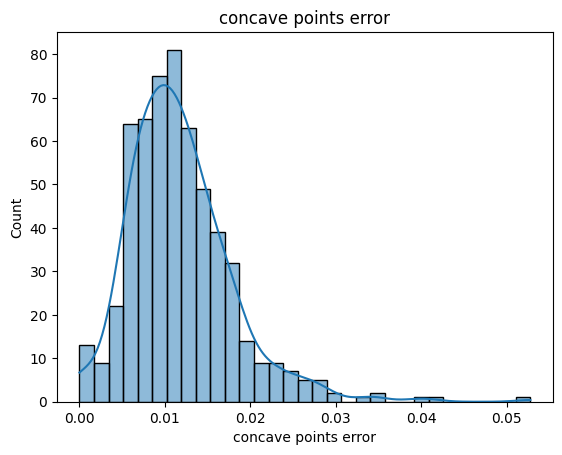


-------------------------------------------------------------------


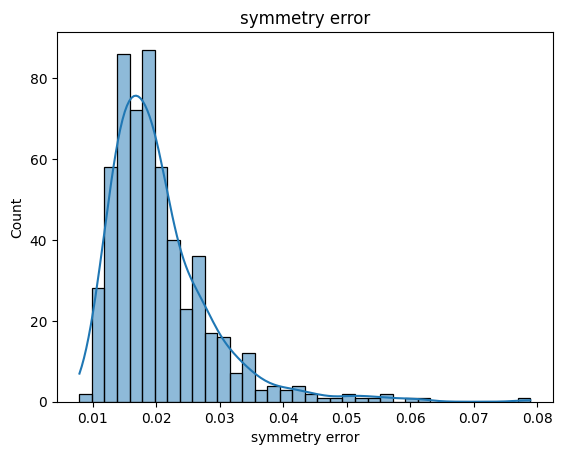


-------------------------------------------------------------------


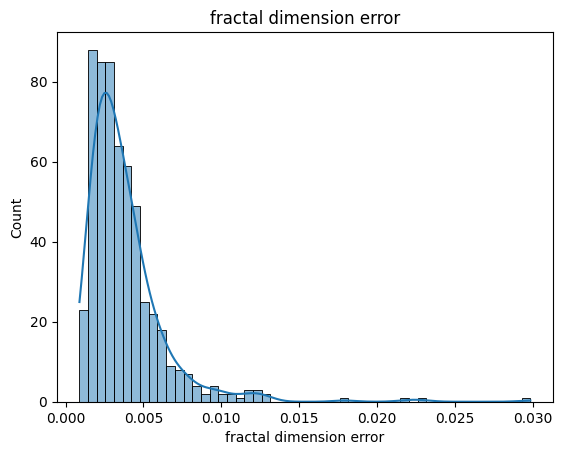


-------------------------------------------------------------------


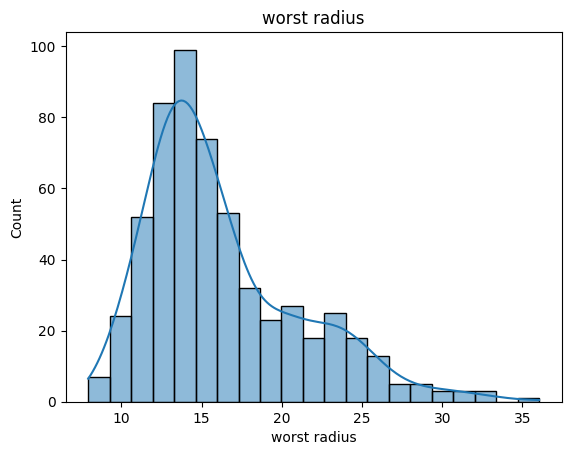


-------------------------------------------------------------------


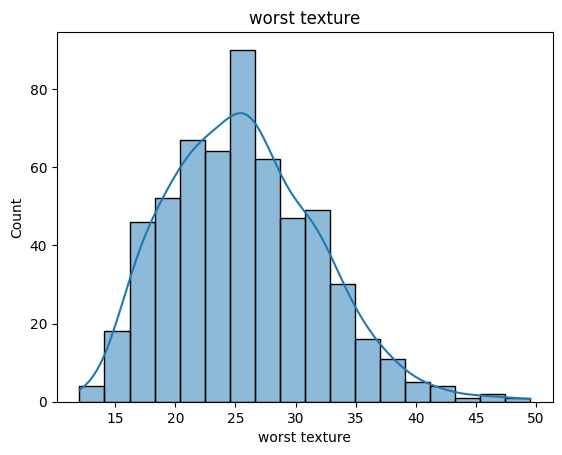


-------------------------------------------------------------------


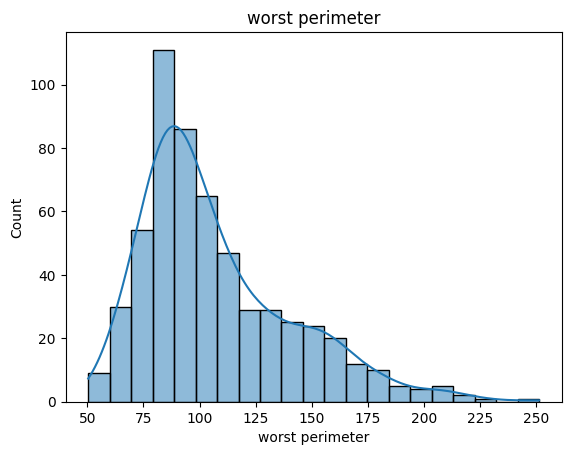


-------------------------------------------------------------------


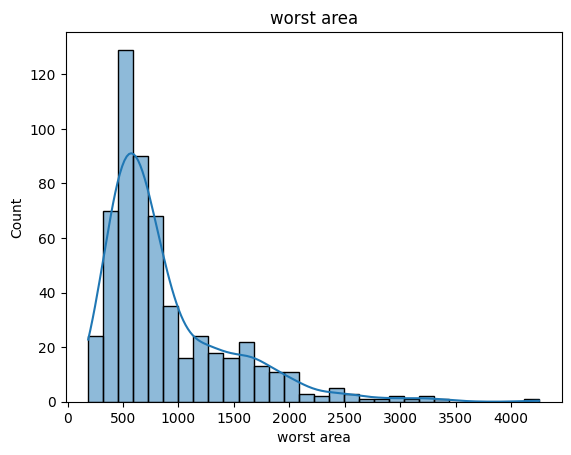


-------------------------------------------------------------------


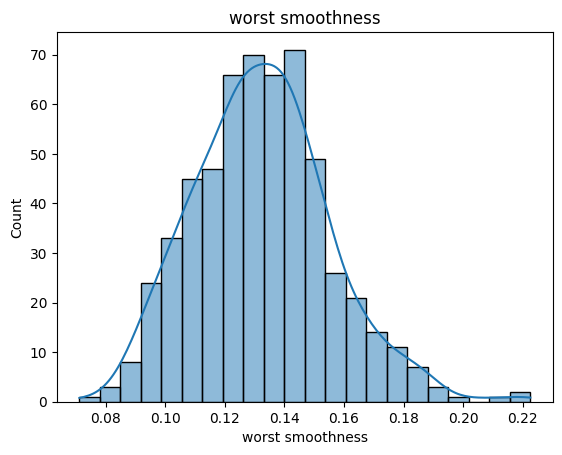


-------------------------------------------------------------------


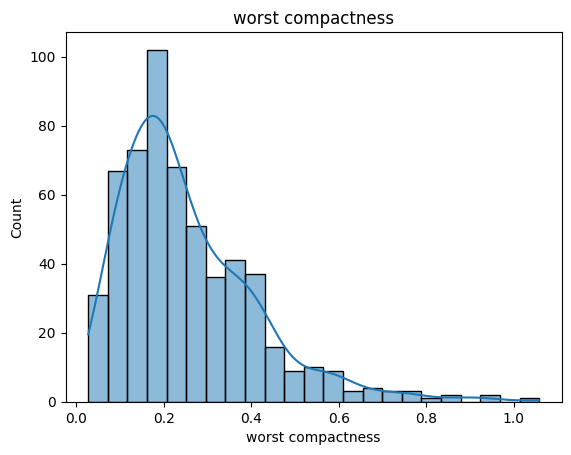


-------------------------------------------------------------------


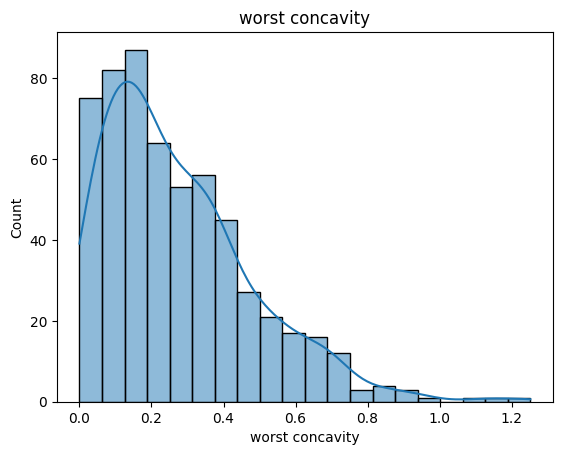


-------------------------------------------------------------------


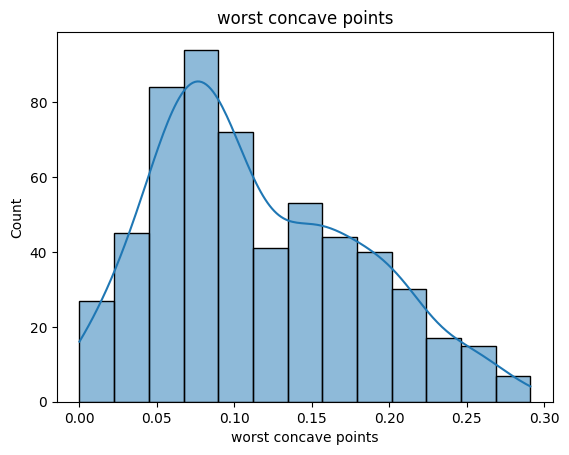


-------------------------------------------------------------------


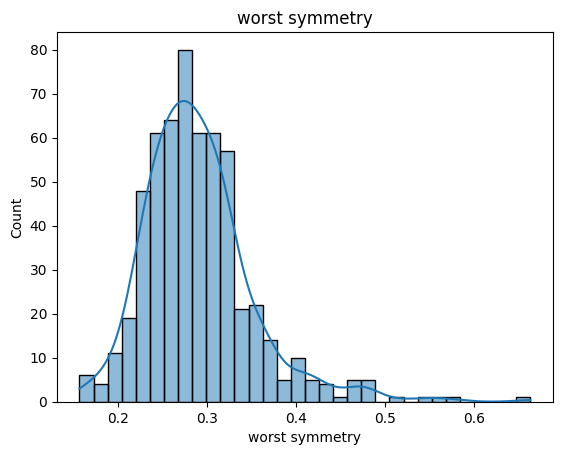


-------------------------------------------------------------------


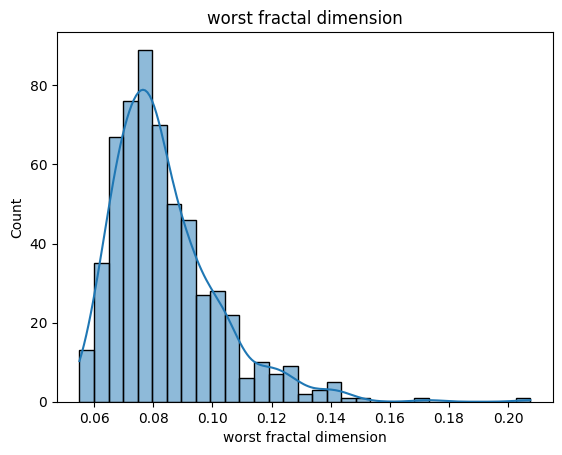


-------------------------------------------------------------------


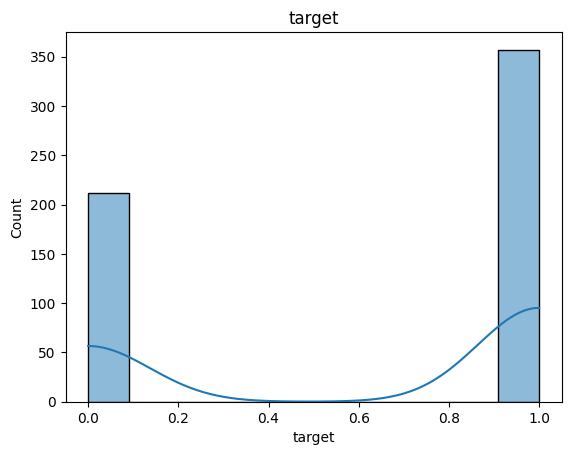


-------------------------------------------------------------------


In [12]:
# visual of each column

for col in breast_cancer_df.columns:
    sns.histplot(x = col,data=breast_cancer_df,kde=True)
    plt.title(col)
    plt.show()
    print()
    print('-------------------------------------------------------------------')

* as we said, right skewness has occurred, we need to transform data to std format, otherwise less accuracy or more loss function will be occur

#**Model Selection**

**splitting features and label**

In [13]:
# features
x = breast_cancer_df.drop('target',axis=1)

# label
y = breast_cancer_df['target']

In [14]:
# check features
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# check label
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [16]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x.values,y,test_size=0.2,stratify=y,random_state=42)

# check shape
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


In [17]:
# testing
print(x_test)

[[1.955e+01 2.877e+01 1.336e+02 ... 1.941e-01 2.818e-01 1.005e-01]
 [1.113e+01 1.662e+01 7.047e+01 ... 4.044e-02 2.383e-01 7.083e-02]
 [1.382e+01 2.449e+01 9.233e+01 ... 1.521e-01 3.651e-01 1.183e-01]
 ...
 [1.532e+01 1.727e+01 1.032e+02 ... 2.229e-01 3.258e-01 1.191e-01]
 [1.262e+01 2.397e+01 8.135e+01 ... 1.180e-01 2.826e-01 9.585e-02]
 [1.168e+01 1.617e+01 7.549e+01 ... 9.815e-02 2.804e-01 8.024e-02]]


**Data Standardization**

* Because of right skewness occurs , mean > media

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# train and test standardizing

# new instance of standard scaler
scaler = StandardScaler()

# x_train std
x_train_std = scaler.fit_transform(x_train)

# x_test std
x_test_std = scaler.transform(x_test)

In [20]:
# check x train std
print(x_train_std)

[[-1.07200079 -0.6584246  -1.0880801  ... -1.35052668 -0.35265805
  -0.54138003]
 [ 1.74874285  0.06650173  1.75115682 ...  1.54991557  0.19107787
  -0.1737386 ]
 [-0.97473376 -0.93112416 -0.99770871 ... -1.70744192 -0.307734
  -1.21303263]
 ...
 [ 0.39844772  1.06867262  0.50751384 ...  1.53492543  0.16164487
   1.23754763]
 [ 0.85331409 -0.0380331   0.9054796  ...  2.10455077  0.31035897
   0.36249578]
 [-0.91179628 -0.82431683 -0.87666079 ... -0.51332734 -0.50756857
   1.30824791]]


In [21]:
# check x test std
print(x_test_std)

[[ 1.56851278  2.16401585  1.74286587 ...  1.20214432 -0.14043064
   0.90036171]
 [-0.84027641 -0.5970672  -0.8741735  ... -1.10124064 -0.81429139
  -0.71323608]
 [-0.07072262  1.19138742  0.03202768 ...  0.57255843  1.14997397
   1.86841162]
 ...
 [ 0.3583966  -0.44935493  0.48264098 ...  1.63386036  0.54117564
   1.91191948]
 [-0.41401799  1.07321761 -0.42314565 ...  0.06139464 -0.1280378
   0.64747227]
 [-0.6829327  -0.69932953 -0.66607058 ... -0.23615965 -0.16211811
  -0.20147486]]


**Visualization**

In [22]:
X_frame = pd.DataFrame(x_train_std)

# check
X_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.072001,-0.658425,-1.088080,-0.939274,-0.135940,-1.008718,-0.968359,-1.102032,0.281062,-0.113231,...,-1.034094,-0.623497,-1.070773,-0.876534,-0.169982,-1.038836,-1.078995,-1.350527,-0.352658,-0.541380
1,1.748743,0.066502,1.751157,1.745559,1.274468,0.842288,1.519852,1.994664,-0.293045,-0.320180,...,1.228342,-0.092833,1.187467,1.104386,1.517001,0.249655,1.178594,1.549916,0.191078,-0.173739
2,-0.974734,-0.931124,-0.997709,-0.867589,-0.613515,-1.138154,-1.092292,-1.243358,0.434395,-0.429247,...,-0.973231,-1.036772,-1.008044,-0.834168,-1.097823,-1.167260,-1.282241,-1.707442,-0.307734,-1.213033
3,-0.145103,-1.215186,-0.123013,-0.253192,0.664482,0.286762,-0.129729,-0.098605,0.555635,0.029395,...,-0.251266,-1.369643,-0.166633,-0.330292,0.234006,0.096874,-0.087521,-0.344838,0.242198,-0.118266
4,-0.771617,-0.081211,-0.803700,-0.732927,-0.672282,-1.006099,-0.798502,-0.684484,0.737495,-0.457213,...,-0.801135,0.079230,-0.824381,-0.741830,-0.911367,-0.984612,-0.933190,-0.777604,0.555118,-0.761639


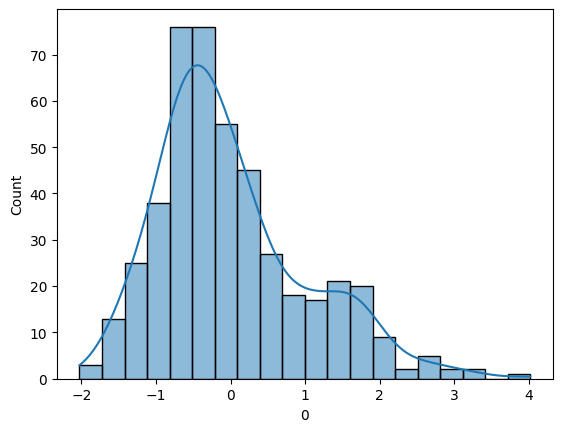

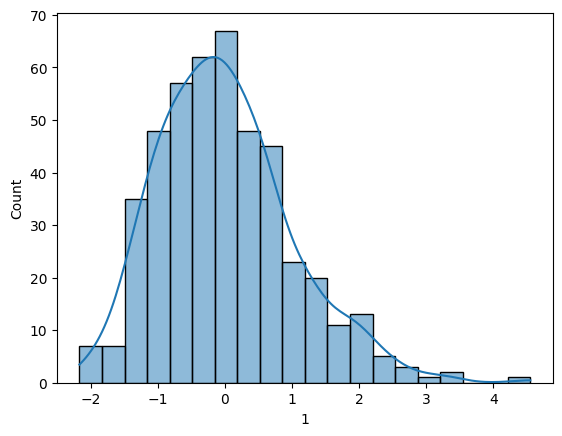

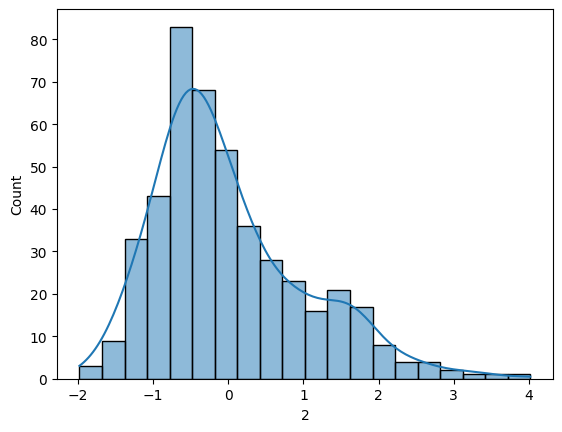

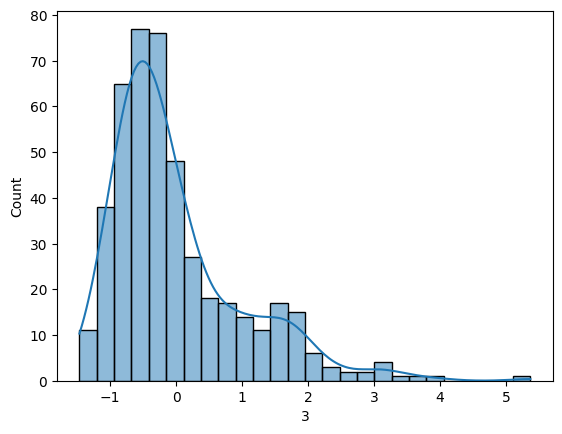

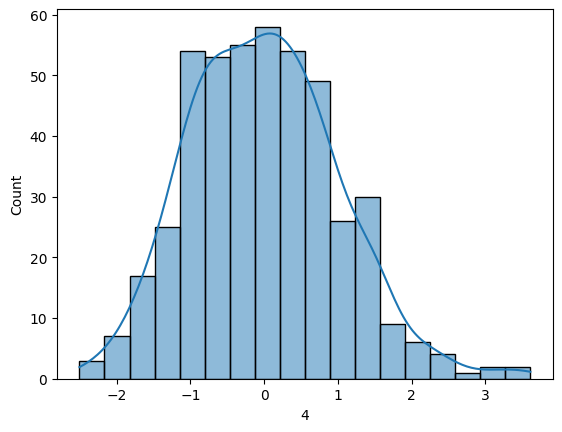

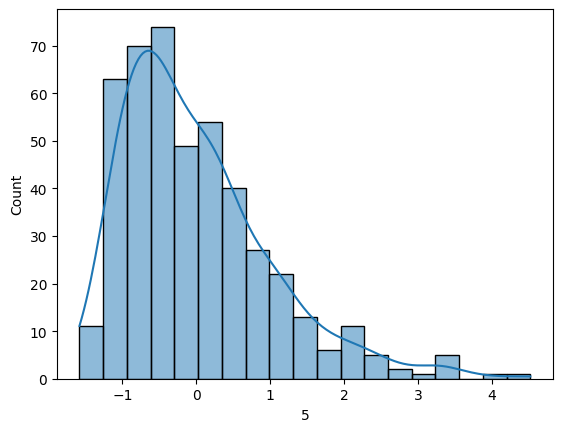

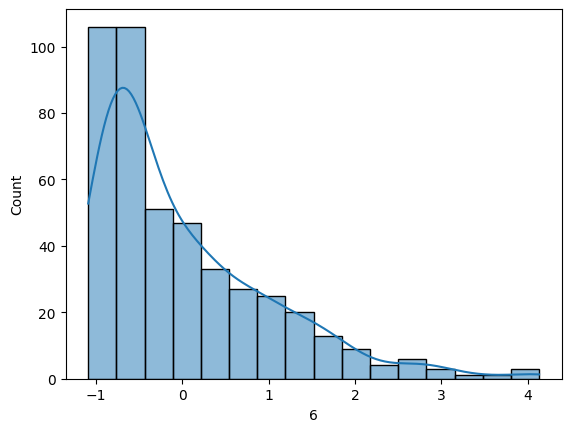

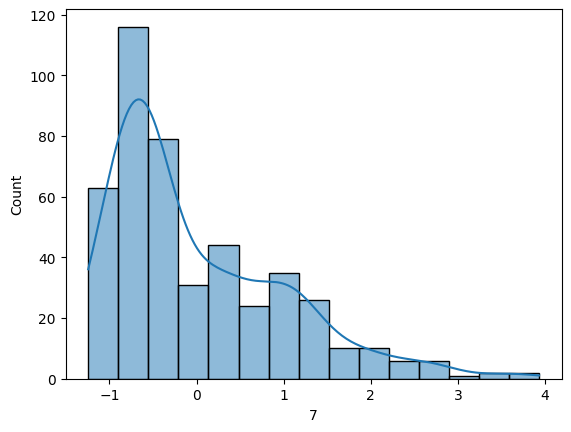

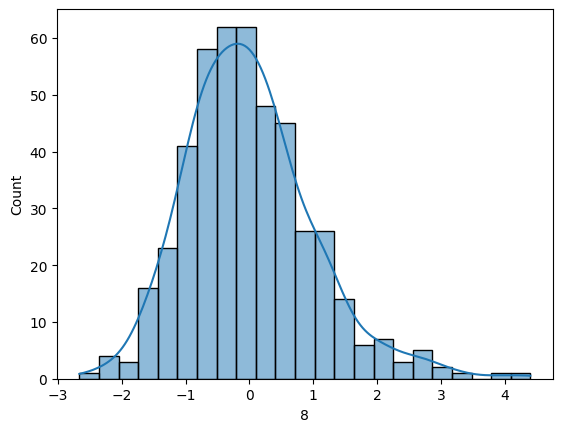

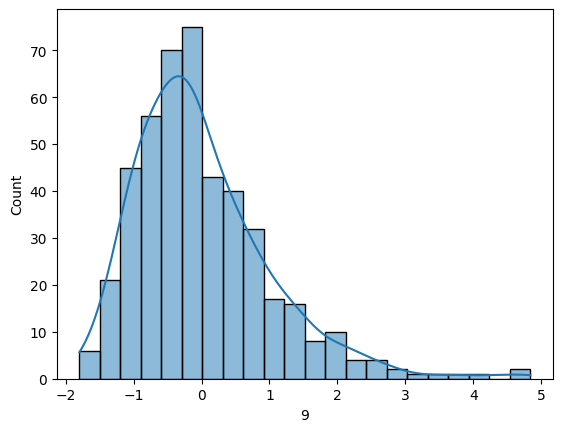

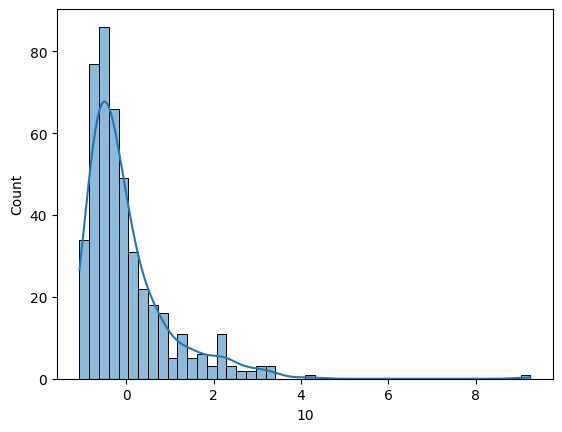

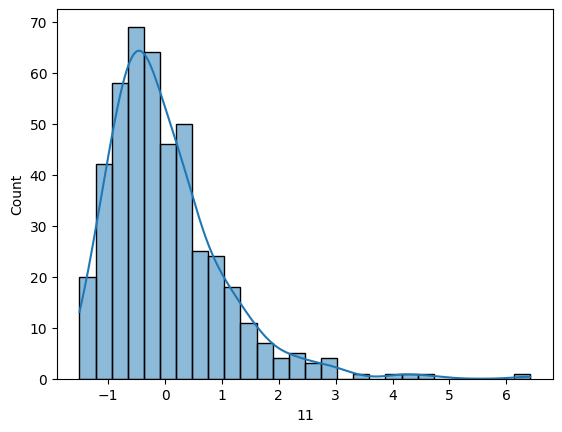

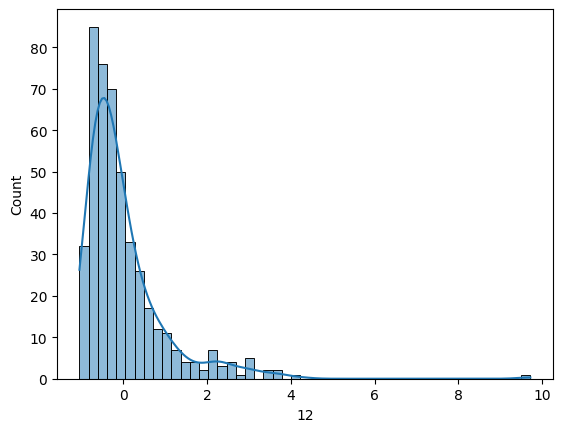

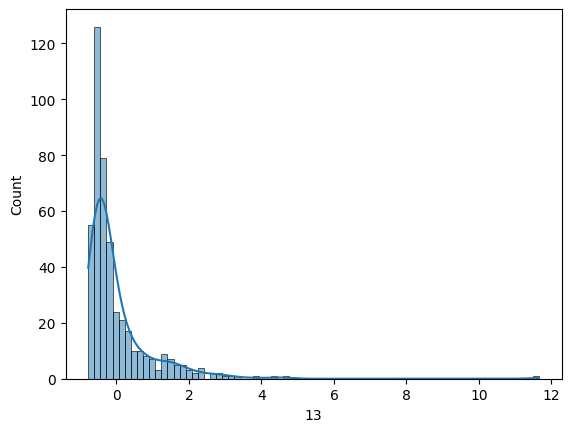

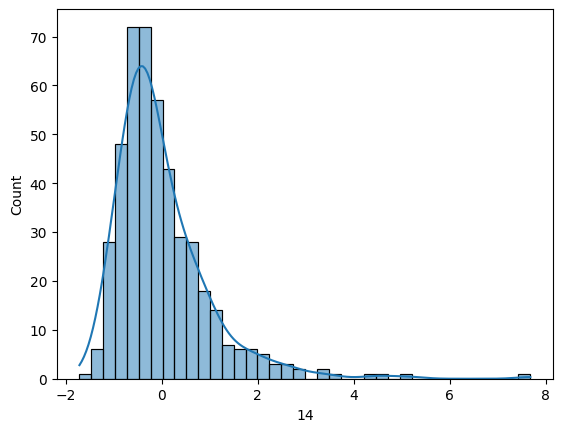

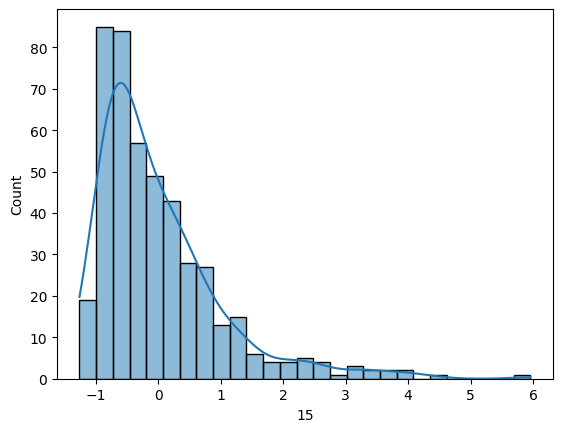

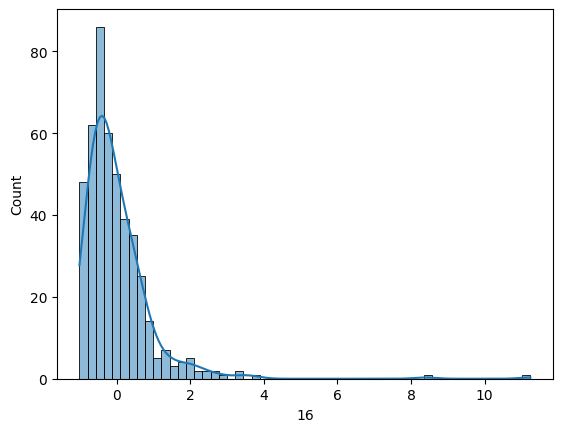

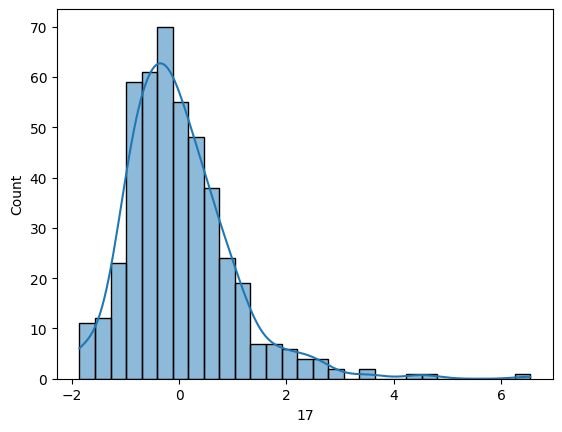

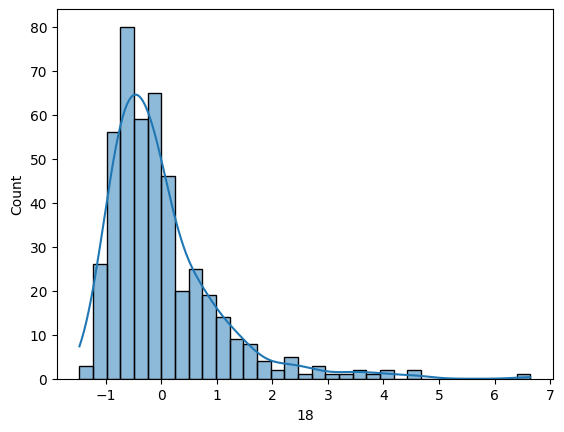

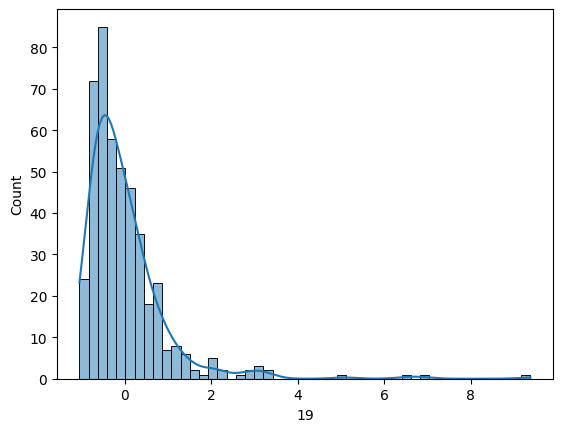

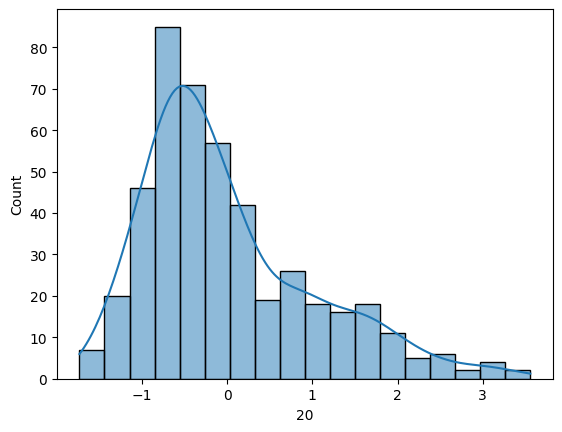

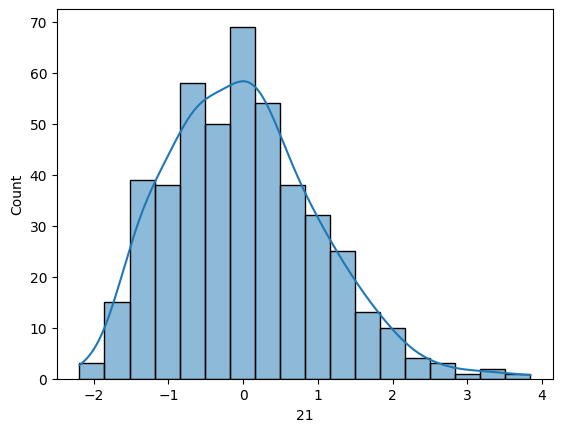

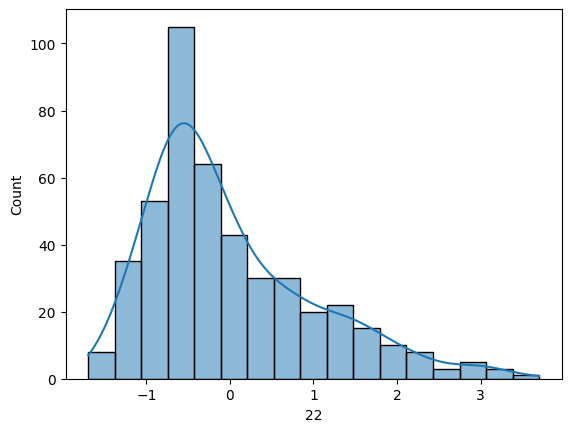

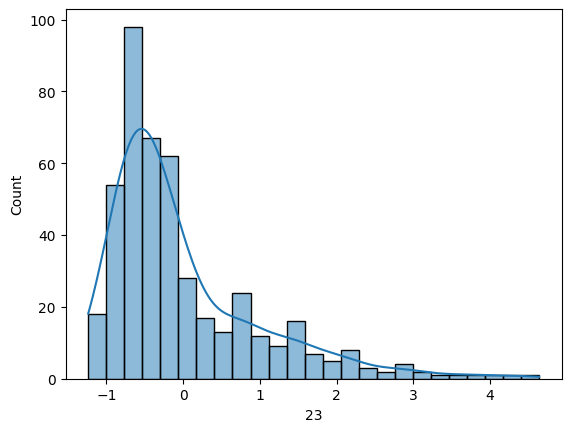

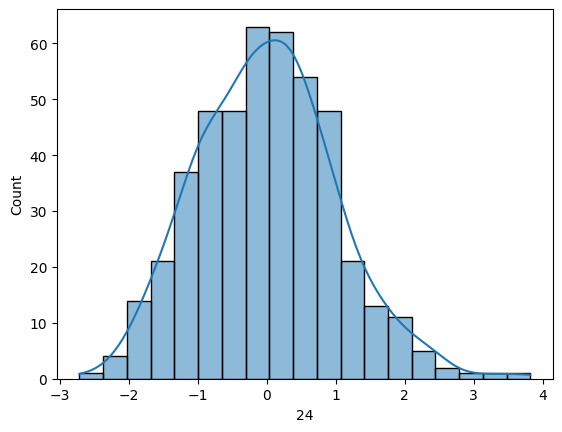

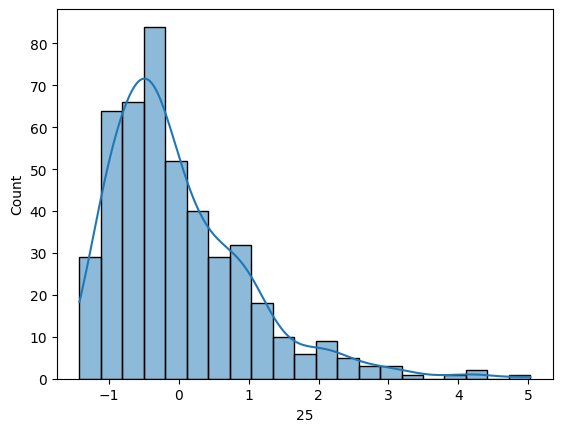

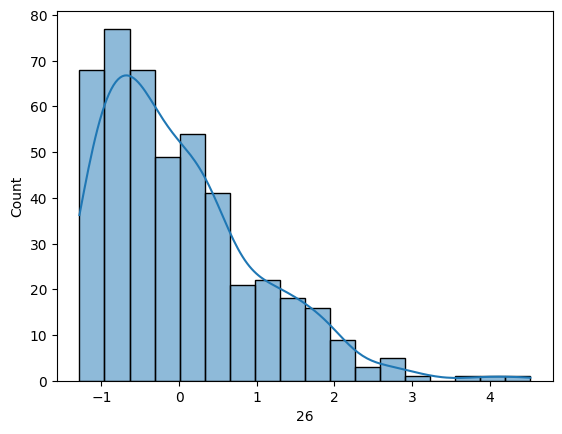

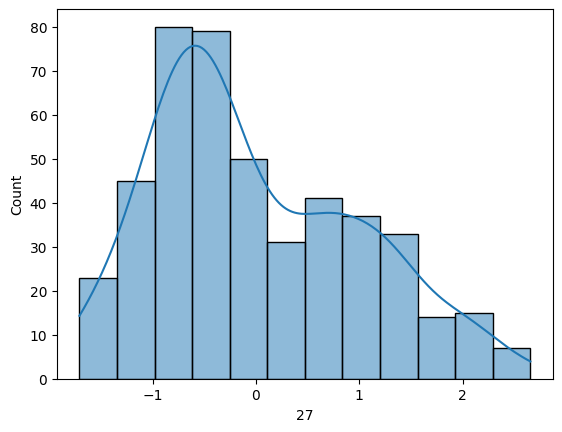

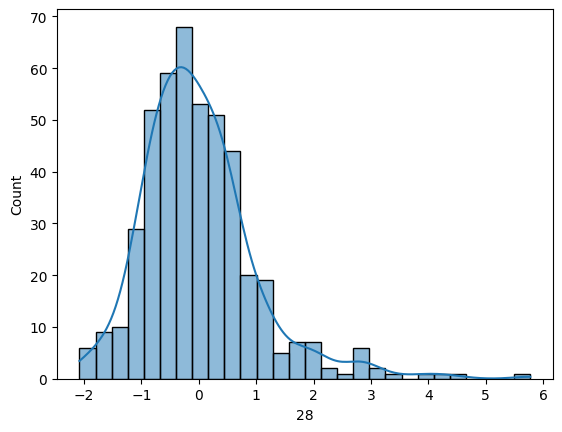

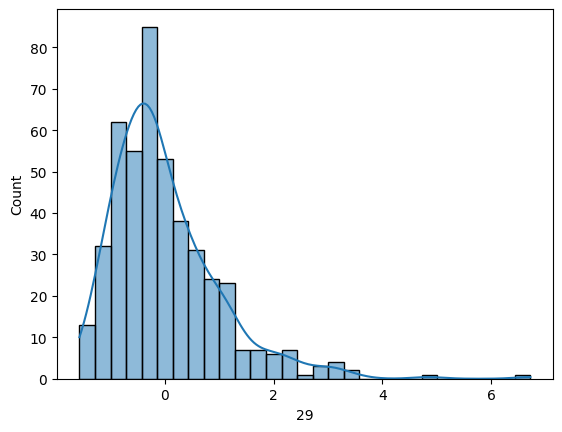

In [23]:
# visual after standardized

for col in X_frame.columns:
    sns.histplot(x=col,data = X_frame,kde=True)
    plt.show()
    print()

* seems, more or less in normal distribution, good enough

#**Model Building**

In [24]:
# initialising seed for random state in tensorflow

# simply random state = 5
tf.random.set_seed(5)

**Creating neural network layers**

In [25]:
# neural network consists,
# input layer - first
# hidden dense layer - second or many
# output layer - last

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation= 'sigmoid')
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Model Compile**

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Evaluation by Epochs**

In [27]:
history = model.fit(x_train_std,y_train, validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.1439 - loss: 1.4527 - val_accuracy: 0.4348 - val_loss: 0.8652
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4614 - loss: 0.8605 - val_accuracy: 0.8043 - val_loss: 0.5219
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8160 - loss: 0.5085 - val_accuracy: 0.9348 - val_loss: 0.3655
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9383 - loss: 0.3439 - val_accuracy: 0.9348 - val_loss: 0.2915
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9594 - loss: 0.2604 - val_accuracy: 0.9565 - val_loss: 0.2487
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9574 - loss: 0.2112 - val_accuracy: 0.9565 - val_loss: 0.2200
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9651 - loss: 0.1791 - val_accuracy: 0.9565 - val_loss: 0.1990
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.1563 - val_accuracy: 0.9565 - val_loss

* we may notice, that accuracy is increasing by epochs whereas loss function is decreasing

**Prediction of Seen data**

In [28]:
x_train_pred = model.predict(x_train_std)

# probability comes
print(x_train_pred)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[6.86748475e-02 8.35735083e-01]
 [8.62373531e-01 2.83305403e-02]
 [4.78119180e-02 8.38287413e-01]
 [3.22279632e-01 7.55406916e-01]
 [9.44694728e-02 6.57375038e-01]
 [3.61831427e-01 6.27793968e-01]
 [1.02999181e-01 5.68431675e-01]
 [1.57863460e-02 7.43814349e-01]
 [6.00769222e-02 9.58138347e-01]
 [3.48227084e-01 7.81867325e-01]
 [1.73338190e-01 7.75050044e-01]
 [2.96287745e-01 7.91795671e-01]
 [6.03018641e-01 2.16657802e-01]
 [1.26012653e-01 7.49272168e-01]
 [8.12047064e-01 8.22445899e-02]
 [1.47685990e-01 8.82388890e-01]
 [7.93479681e-01 7.22172037e-02]
 [1.51249424e-01 7.07950830e-01]
 [6.81154191e-01 2.02353001e-01]
 [9.43978965e-01 1.15927849e-02]
 [2.00692430e-01 5.96164167e-01]
 [1.07704118e-01 7.44633198e-01]
 [7.74306357e-02 9.16017115e-01]
 [8.11221004e-01 1.56700328e-01]
 [2.46869907e-01 8.28972638e-01]
 [1.72191501e-01 6.91485405e-01]
 [3.81714284e-01 7.65451789e-01]
 [8.63254428e-01 2.57567503e-02]
 [4.92578447e-02 7.10610569e-01]
 [4.

**converting probability to labels of 0 , 1**

In [29]:
x_train_labels = [np.argmax(i) for i in x_train_pred]

In [30]:
# check labels
print(x_train_labels)

[np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1)

* came as 0's and 1's based on probability
* Let's clear - based on max value provides index
* [0.45,0.56] - index of max is 1
* [0.78,0.22] - index of max is 0
* This is how it works

**Prediction of unseen data**

In [31]:
def return_labels(arr):
    return [np.argmax(i) for i in arr]

In [34]:
x_test_pred = model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [35]:
x_test_labels = return_labels(x_test_pred)

# check labels
print(x_test_labels)

[np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0)

**Evaluation of unseen data**

In [37]:
accuracy,loss = model.evaluate(x_test_std,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9564 - loss: 0.1603


* seems, we got 95.64% and loss function 0.16, which is really good at model performance.

#**Build Predictive System**

In [48]:
# input data of benign and malignant

b = (1.308e+01, 1.571e+01, 8.563e+01, 5.200e+02, 1.075e-01, 1.270e-01,
       4.568e-02, 3.110e-02, 1.967e-01, 6.811e-02, 1.852e-01, 7.477e-01,
       1.383e+00, 1.467e+01, 4.097e-03, 1.898e-02, 1.698e-02, 6.490e-03,
       1.678e-02, 2.425e-03, 1.450e+01, 2.049e+01, 9.609e+01, 6.305e+02,
       1.312e-01, 2.776e-01, 1.890e-01, 7.283e-02, 3.184e-01, 8.183e-02)
m = (1.900e+01, 1.891e+01, 1.234e+02, 1.138e+03, 8.217e-02, 8.028e-02,
       9.271e-02, 5.627e-02, 1.946e-01, 5.044e-02, 6.896e-01, 1.342e+00,
       5.216e+00, 8.123e+01, 4.428e-03, 2.731e-02, 4.040e-02, 1.361e-02,
       2.030e-02, 2.686e-03, 2.232e+01, 2.573e+01, 1.482e+02, 1.538e+03,
       1.021e-01, 2.264e-01, 3.207e-01, 1.218e-01, 2.841e-01, 6.541e-02)
# tuple to numpy array

b_arr = np.asarray(b)
m_arr = np.asarray(m)

# reshape to single row with unknown column

b_reshape = b_arr.reshape(1,-1)
m_reshape = m_arr.reshape(1,-1)

# standardizing

b_std = scaler.transform(b_reshape)
m_std = scaler.transform(m_reshape)


# prediction

b_pred = model.predict(b_std)
m_pred = model.predict(m_std)

# labels
b_label = return_labels(b_pred)
m_label = return_labels(m_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


**Check Prediction**

In [49]:
def print_pred(arr):
    if arr[0] == 0:
        print('Malignant Case')
    else:
        print('Benign Case')

In [50]:
# b label
print_pred(b_label)

# m label
print_pred(m_label)

Benign Case
Malignant Case


* so far, we have done great progress.
* Utilised neural network to breast cancer classification
* Achieved accuracy of 95%
* Minimal loss function of 0.16
* Thank you...